# Лабораторная работа 4. Подбор параметров и работа с данными

## Линейная регрессия

In [1]:
%pylab inline

import seaborn as sns
sns.set(style="whitegrid")

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
def pairplot(df, target):
    ncol, nrow = 7, df.shape[1] // 7 + (df.shape[1] % 7 > 0)
    plt.figure(figsize=(ncol * 4, nrow * 4))

    for i, feature in enumerate(df.columns):
        plt.subplot(nrow, ncol, i + 1)
        plt.scatter(df[feature], target, s=10, marker='o', alpha=.6)
        plt.xlabel(feature)
        if i % ncol == 0:
            plt.ylabel('target')

В данном задании мы рассмотрим стандартный датасет для задачи регрессии Boston Housing, в котором необходимо предсказать стоимость недвижимости по 13 признакам.

Датасет достаточно просто загрузить из библиотеки scikit-learn:

In [3]:
data = datasets.load_boston()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
y = data.target

In [4]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Разделим выборку на обучающую и тестовую в отношении 8/2:

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df, y, train_size=0.8, random_state=42)

__Задание 1.__ Обучение линейной регрессии.

Обучите стандартную линейную регрессию, а также с $L_1$ и $L_2$ регуляризаторами (используйте параметры по умолчанию). Посчитайте метрику $R^2$ для каждого метода (метод `score`).

### LinearRegression

In [7]:
lin_reg = LinearRegression()

In [8]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [9]:
y_pred = lin_reg.predict(x_test)

In [10]:
mean_squared_error(y_test, y_pred)

24.291119474973456

In [11]:
lin_reg.score(x_test, y_test)

0.6687594935356329

### Lasso

In [12]:
reg_lasso = Lasso()

In [13]:
reg_lasso.fit(x_train, y_train)

Lasso()

In [14]:
y_pred = reg_lasso.predict(x_test)

In [15]:
mean_squared_error(y_test, y_pred)

24.4094897612997

In [16]:
reg_lasso.score(x_test, y_test)

0.6671453631686304

### Ridge

In [17]:
reg_ridge = Ridge()

In [18]:
reg_ridge.fit(x_train, y_train)

Ridge()

In [19]:
y_pred = reg_ridge.predict(x_test)

In [20]:
mean_squared_error(y_test, y_pred)

24.477191227708683

In [21]:
reg_ridge.score(x_test, y_test)

0.6662221670168518

__Задание 2.__ Подбор гиперпараметров.

Для Lasso- и Ridge-регресий подберите коэффициент регуляризации по обучающей выборке с помощью кросс-валидации. Параметры для перебора возьмите по логарифмической сетке от $10^{-6}$ до $10^6$).
Также посчитайте метрику $R^2$ для тестовой выборки и сравните с предыдущими результатами. Заметно ли изменилось качество?

Useful: GridSearchCV, RidgeCV, LassoCV

### Lasso

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
alphas = np.log(10**np.linspace(-6,6,100))

In [24]:
grid = {'alpha': alphas}

In [25]:
lassoCV = GridSearchCV(Lasso(max_iter=2000), grid, scoring='r2', cv = 5, return_train_score=True)

In [26]:
lassoCV.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4265.1445617856225, tolerance: 2.764448730650155
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12551.909085936753, tolerance: 2.8821090464396293
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9510.855403486603, tolerance: 2.764448730650155
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

GridSearchCV(cv=5, estimator=Lasso(max_iter=2000),
             param_grid={'alpha': array([-13.81551056, -13.53640933, -13.25730811, -12.97820689,
       -12.69910566, -12.42000444, -12.14090322, -11.86180199,
       -11.58270077, -11.30359955, -11.02449832, -10.7453971 ,
       -10.46629588, -10.18719465,  -9.90809343,  -9.62899221,
        -9.34989098,  -9.07078976,  -8.79168854,  -8.51258731,
        -8.23348609,  -7.954384...
         6.27977753,   6.55887875,   6.83797997,   7.1170812 ,
         7.39618242,   7.67528364,   7.95438487,   8.23348609,
         8.51258731,   8.79168854,   9.07078976,   9.34989098,
         9.62899221,   9.90809343,  10.18719465,  10.46629588,
        10.7453971 ,  11.02449832,  11.30359955,  11.58270077,
        11.86180199,  12.14090322,  12.42000444,  12.69910566,
        12.97820689,  13.25730811,  13.53640933,  13.81551056])},
             return_train_score=True, scoring='r2')

In [27]:
lassoCV.best_params_

{'alpha': 0.13955061169660865}

In [28]:
best_score = lassoCV.best_score_
best_score

0.7078936368519757

In [29]:
best_index = lassoCV.best_index_

In [30]:
df = pd.DataFrame.from_dict(lassoCV.cv_results_)

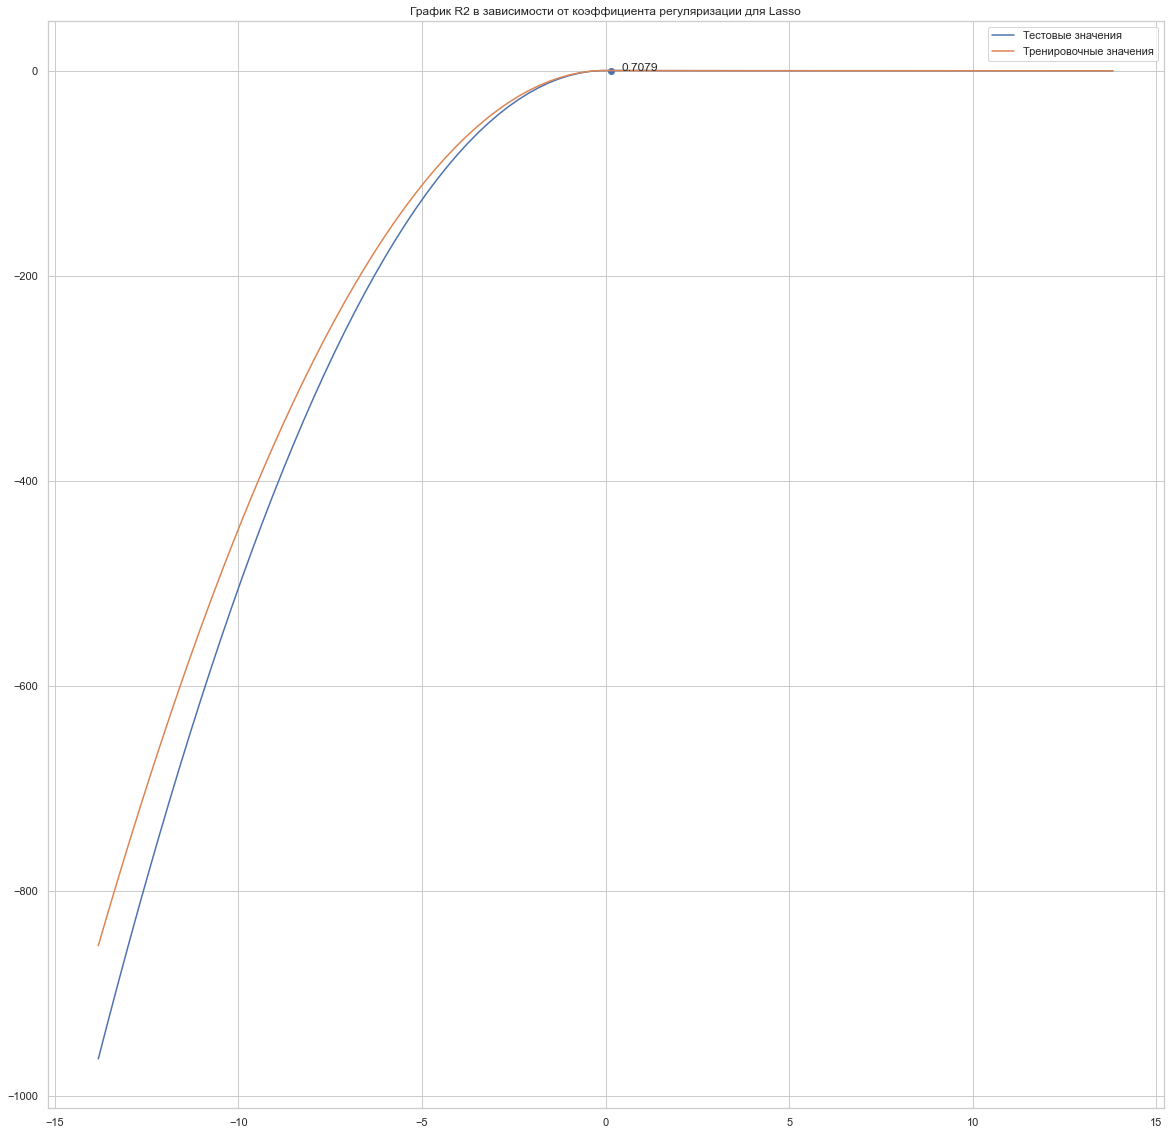

In [31]:
plt.figure(figsize=(20, 20))
ax = plt.gca()

plt.plot(df['param_alpha'], df['mean_test_score'], label='Тестовые значения')
plt.plot(df['param_alpha'], df['mean_train_score'], label='Тренировочные значения')


plt.scatter(df['param_alpha'][best_index], df['mean_test_score'][best_index])


# Annotate the best score for that scorer
ax.annotate("%0.4f" % best_score, (df['param_alpha'][best_index] + 0.3, best_score))

plt.legend()
plt.title("График R2 в зависимости от коэффициента регуляризации для Lasso")
plt.show()

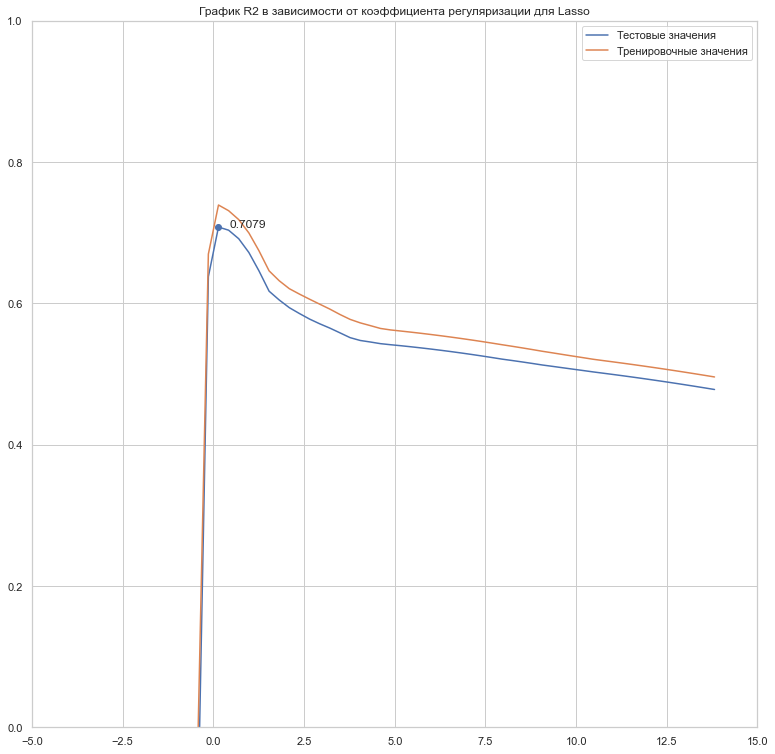

In [32]:
plt.figure(figsize=(13, 13))
ax = plt.gca()
ax.set_xlim(-5, 15)
ax.set_ylim(0, 1)


plt.plot(df['param_alpha'], df['mean_test_score'], label='Тестовые значения')
plt.plot(df['param_alpha'], df['mean_train_score'], label='Тренировочные значения')


plt.scatter(df['param_alpha'][best_index], df['mean_test_score'][best_index])


# Annotate the best score for that scorer
ax.annotate("%0.4f" % best_score, (df['param_alpha'][best_index] + 0.3, best_score))

plt.legend()
plt.title("График R2 в зависимости от коэффициента регуляризации для Lasso")
plt.show()

### Ridge

In [33]:
ridgeCV = GridSearchCV(Ridge(), grid, scoring='r2', cv = 5, return_train_score=True)

In [34]:
ridgeCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([-13.81551056, -13.53640933, -13.25730811, -12.97820689,
       -12.69910566, -12.42000444, -12.14090322, -11.86180199,
       -11.58270077, -11.30359955, -11.02449832, -10.7453971 ,
       -10.46629588, -10.18719465,  -9.90809343,  -9.62899221,
        -9.34989098,  -9.07078976,  -8.79168854,  -8.51258731,
        -8.23348609,  -7.95438487,  -7.6752836...
         6.27977753,   6.55887875,   6.83797997,   7.1170812 ,
         7.39618242,   7.67528364,   7.95438487,   8.23348609,
         8.51258731,   8.79168854,   9.07078976,   9.34989098,
         9.62899221,   9.90809343,  10.18719465,  10.46629588,
        10.7453971 ,  11.02449832,  11.30359955,  11.58270077,
        11.86180199,  12.14090322,  12.42000444,  12.69910566,
        12.97820689,  13.25730811,  13.53640933,  13.81551056])},
             return_train_score=True, scoring='r2')

In [35]:
ridgeCV.best_estimator_

Ridge(alpha=-0.1395506116966087)

In [36]:
best_score = ridgeCV.best_score_
best_score

0.724563939400415

In [37]:
best_index = ridgeCV.best_index_

In [38]:
df = pd.DataFrame.from_dict(ridgeCV.cv_results_)
df1 = df[['mean_test_score', 'mean_train_score', 'param_alpha']]

In [39]:
df.mean_test_score.values

array([  0.64344809,   0.65189881,   0.65880931,   0.66453595,
         0.66933659,   0.67340166,   0.6768744 ,   0.67986423,
         0.68245597,   0.68471617,   0.68669764,   0.68844268,
         0.68998549,   0.69135396,   0.6925709 ,   0.69365515,
         0.69462227,   0.69548518,   0.69625459,   0.69693936,
         0.69754675,   0.69808268,   0.69855183,   0.69895775,
         0.69930295,   0.69958888,   0.6998159 ,   0.69998323,
         0.70008874,   0.70012876,   0.70009765,   0.69998727,
         0.69978614,   0.69947815,   0.69904057,   0.69844083,
         0.69763126,   0.69653979,   0.695053  ,   0.69298277,
         0.68999484,   0.68543797,   0.67786827,   0.66339535,
         0.62737785,   0.44872902, -27.40628475,   0.66038431,
         0.72021402,   0.72456394,   0.72394684,   0.72270719,
         0.72153165,   0.72052961,   0.71969517,   0.71900116,
         0.71842051,   0.71793071,   0.7175139 ,   0.71715615,
         0.71684654,   0.71657653,   0.7163393 ,   0.71

In [40]:
df.mean_test_score.min()

-27.406284752538625

In [41]:
df.params[46]

{'alpha': -0.9768542818762609}

In [42]:
results = ridgeCV.cv_results_

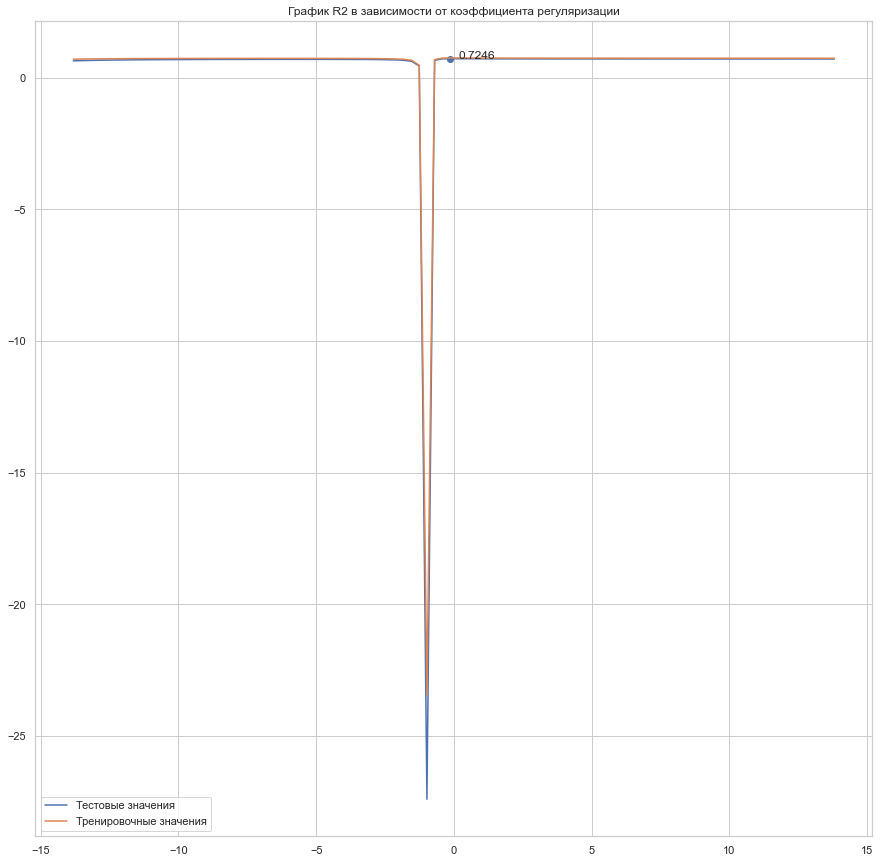

In [43]:
plt.figure(figsize=(15, 15))
ax = plt.gca()

plt.plot(df['param_alpha'], df['mean_test_score'], label='Тестовые значения')
plt.plot(df['param_alpha'], df['mean_train_score'], label='Тренировочные значения')


plt.scatter(df['param_alpha'][best_index], df['mean_test_score'][best_index])


# Annotate the best score for that scorer
ax.annotate("%0.4f" % best_score, (df['param_alpha'][best_index] + 0.3, best_score))

plt.legend()
plt.title("График R2 в зависимости от коэффициента регуляризации")
plt.show()

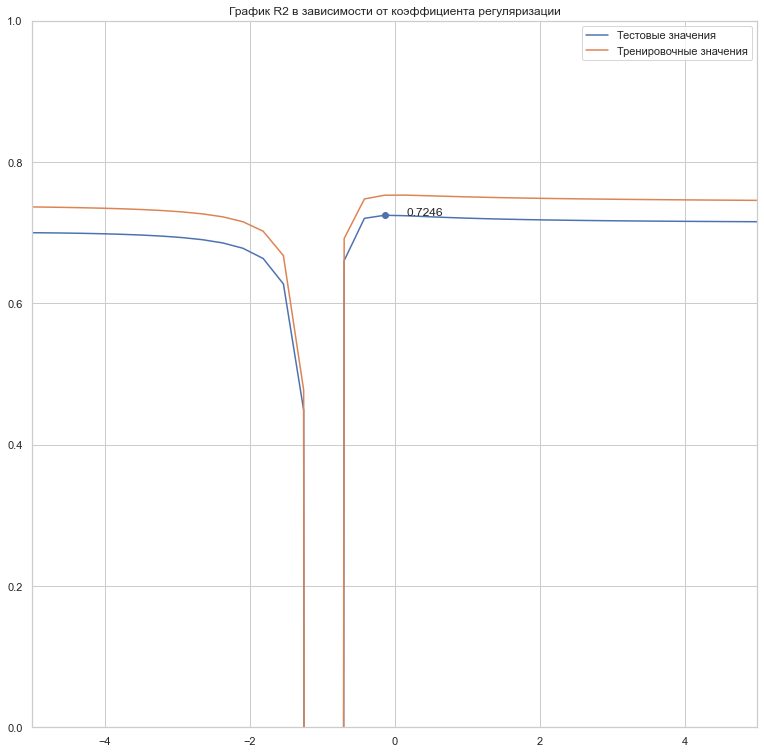

In [44]:
plt.figure(figsize=(13, 13))
ax = plt.gca()
ax.set_xlim(-5, 5)
ax.set_ylim(0, 1)


plt.plot(df['param_alpha'], df['mean_test_score'], label='Тестовые значения')
plt.plot(df['param_alpha'], df['mean_train_score'], label='Тренировочные значения')


plt.scatter(df['param_alpha'][best_index], df['mean_test_score'][best_index])


# Annotate the best score for that scorer
ax.annotate("%0.4f" % best_score, (df['param_alpha'][best_index] + 0.3, best_score))

plt.legend()
plt.title("График R2 в зависимости от коэффициента регуляризации")
plt.show()

Постройте график зависимости $R^2$ для обучающей и тестовой (на кросс-валидации) выборок в зависимости от значения гиперпараметра. Для Lasso также постройте график зависимости количества ненулевых весов.

В какой момент происходит недообучение? Почему?

__Ответ__:

---

## Подготовка данных

Как вы могли заметить, большого прироста качества с помощью подбора коэфициента регуляризации добиться не удалось. Поэтому прежде чем бросаться обучать модели, необходимо изучить и предобработать данные.

__Задание 3.__ Масштабирование.

Зачастую признаки в сырых данных имеют разный масштаб. Попробуйте применить масштабирование к данным, сравните качество. Заметно ли изменение?

Pipeline, StandardScaler, MinMaxScaler

### StandartScale

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
columns = x_train.columns

In [47]:
scaler = StandardScaler()

In [48]:
scaler.fit(x_train)

StandardScaler()

In [49]:
X_train_scaled = scaler.transform(x_train)

In [50]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns)

In [51]:
X_train_scaled.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
5,-0.385519,-0.500320,-0.523527,-0.278089,-0.540021,0.162452,-1.926178,0.755292,-0.507797,-0.705154,0.575794,0.408971,-1.038833
6,-0.402695,-0.500320,-0.841560,-0.278089,-0.352880,-0.393595,-1.218030,1.022793,-0.507797,-1.084748,0.845343,0.444180,-0.626249
7,-0.404845,3.175545,-1.487791,-0.278089,-1.246051,0.094710,-1.175112,2.527219,-0.857485,-0.548496,-0.457477,0.444180,-0.941672
8,1.305053,-0.500320,1.033237,-0.278089,1.561057,-0.231297,1.124581,-0.889790,1.706891,1.578434,0.845343,-3.793837,1.970358
9,1.221694,-0.500320,1.033237,-0.278089,0.344643,0.756603,1.124581,-1.100587,1.706891,1.578434,0.845343,-1.934525,1.031130


In [52]:
X_test_scaled = scaler.transform(x_test)

In [53]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns)

In [54]:
y_train = pd.DataFrame(y_train)

In [55]:
ridgeCV = GridSearchCV(Ridge(), grid, scoring='r2', cv = 5, return_train_score=True)

In [56]:
ridgeCV.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([-13.81551056, -13.53640933, -13.25730811, -12.97820689,
       -12.69910566, -12.42000444, -12.14090322, -11.86180199,
       -11.58270077, -11.30359955, -11.02449832, -10.7453971 ,
       -10.46629588, -10.18719465,  -9.90809343,  -9.62899221,
        -9.34989098,  -9.07078976,  -8.79168854,  -8.51258731,
        -8.23348609,  -7.95438487,  -7.6752836...
         6.27977753,   6.55887875,   6.83797997,   7.1170812 ,
         7.39618242,   7.67528364,   7.95438487,   8.23348609,
         8.51258731,   8.79168854,   9.07078976,   9.34989098,
         9.62899221,   9.90809343,  10.18719465,  10.46629588,
        10.7453971 ,  11.02449832,  11.30359955,  11.58270077,
        11.86180199,  12.14090322,  12.42000444,  12.69910566,
        12.97820689,  13.25730811,  13.53640933,  13.81551056])},
             return_train_score=True, scoring='r2')

In [57]:
ridgeCV.best_estimator_

Ridge(alpha=2.9305628456287867)

In [58]:
best_score = ridgeCV.best_score_
best_score

0.7245659789067738

### MinMax

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
min_max = MinMaxScaler()

In [61]:
min_max.fit(x_train)

MinMaxScaler()

In [62]:
X_train_min_max = min_max.transform(x_train)

In [63]:
X_train_min_max = pd.DataFrame(X_train_min_max, columns=columns)

In [64]:
X_train_min_max

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.168763,0.00,0.642963,0.0,0.471193,0.293065,0.972194,0.088307,1.000000,0.914122,0.808511,0.880428,0.639625
1,0.006950,0.00,0.274074,0.0,0.314815,0.400854,0.552008,0.306359,0.130435,0.229008,0.893617,0.996772,0.185982
2,0.000288,0.35,0.197037,0.0,0.108848,0.440919,0.210093,0.501150,0.000000,0.223282,0.457447,0.912628,0.168322
3,0.079146,0.00,0.642963,0.0,0.471193,0.455562,0.846550,0.081132,1.000000,0.914122,0.808511,0.005547,0.594923
4,0.008056,0.00,0.274074,0.0,0.314815,0.379093,0.685891,0.242514,0.130435,0.229008,0.893617,0.984997,0.263521
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.001822,0.00,0.289630,0.0,0.277778,0.401261,0.916581,0.098337,0.173913,0.375954,0.882979,0.996898,0.467163
400,0.003261,0.20,0.230370,0.0,0.162551,0.405328,0.403708,0.300030,0.086957,0.068702,0.638298,0.979197,0.310982
401,0.000067,0.80,0.047037,0.0,0.102881,0.563758,0.276004,0.656039,0.130435,0.177481,0.468085,0.984972,0.117550
402,0.125342,0.00,0.642963,0.0,0.730453,0.562538,0.944387,0.090489,1.000000,0.914122,0.808511,0.276186,0.594371


In [65]:
X_test_min_max = min_max.transform(x_test)

In [66]:
X_test_min_max = pd.DataFrame(X_test_min_max, columns=columns)

In [67]:
ridgeCV = GridSearchCV(Ridge(), grid, scoring='r2', cv = 5, return_train_score=True)

In [68]:
ridgeCV.fit(X_train_min_max, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([-13.81551056, -13.53640933, -13.25730811, -12.97820689,
       -12.69910566, -12.42000444, -12.14090322, -11.86180199,
       -11.58270077, -11.30359955, -11.02449832, -10.7453971 ,
       -10.46629588, -10.18719465,  -9.90809343,  -9.62899221,
        -9.34989098,  -9.07078976,  -8.79168854,  -8.51258731,
        -8.23348609,  -7.95438487,  -7.6752836...
         6.27977753,   6.55887875,   6.83797997,   7.1170812 ,
         7.39618242,   7.67528364,   7.95438487,   8.23348609,
         8.51258731,   8.79168854,   9.07078976,   9.34989098,
         9.62899221,   9.90809343,  10.18719465,  10.46629588,
        10.7453971 ,  11.02449832,  11.30359955,  11.58270077,
        11.86180199,  12.14090322,  12.42000444,  12.69910566,
        12.97820689,  13.25730811,  13.53640933,  13.81551056])},
             return_train_score=True, scoring='r2')

In [69]:
ridgeCV.best_estimator_

Ridge(alpha=0.4186518350898262)

In [70]:
best_score = ridgeCV.best_score_
best_score

0.7252514400076074

__Задание 4.__ Новые признаки.

Полезным также бывает посмотреть как целевая переменная зависит от каждого признака.

In [71]:
x_train_log = x_train.copy()

In [72]:
x_test_log = x_test.copy()

In [73]:
x_train_log.LSTAT = np.log(x_train_log.LSTAT)

In [74]:
x_test_log.LSTAT = np.log(x_test_log.LSTAT)

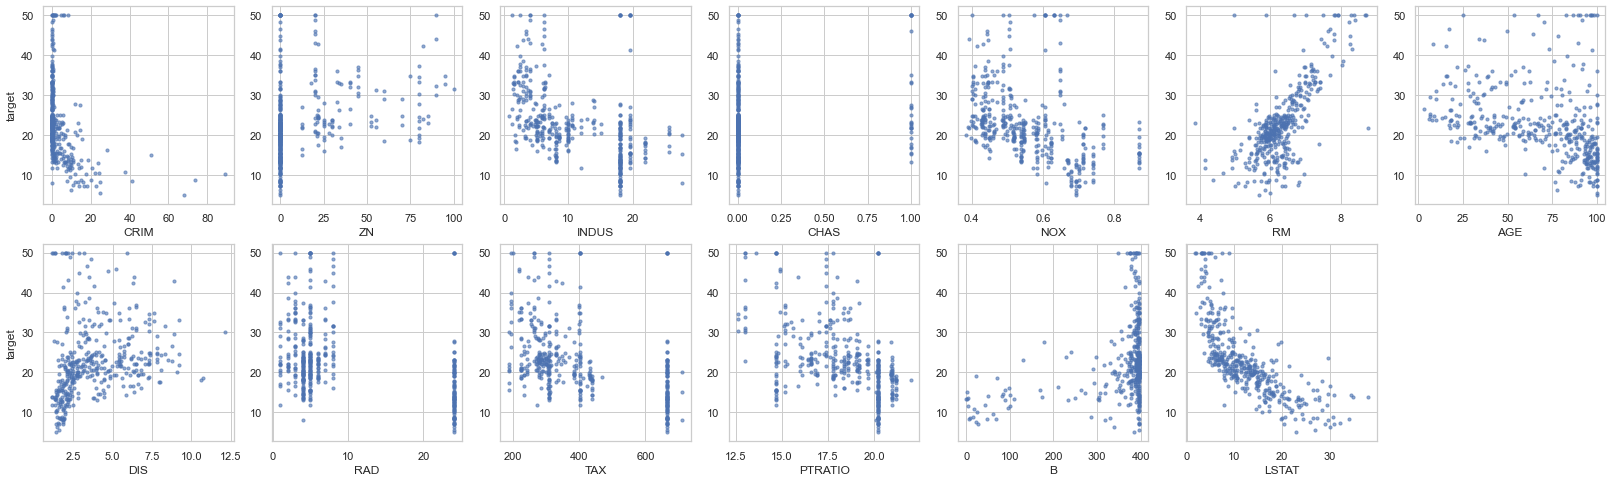

In [75]:
pairplot(x_train, y_train)

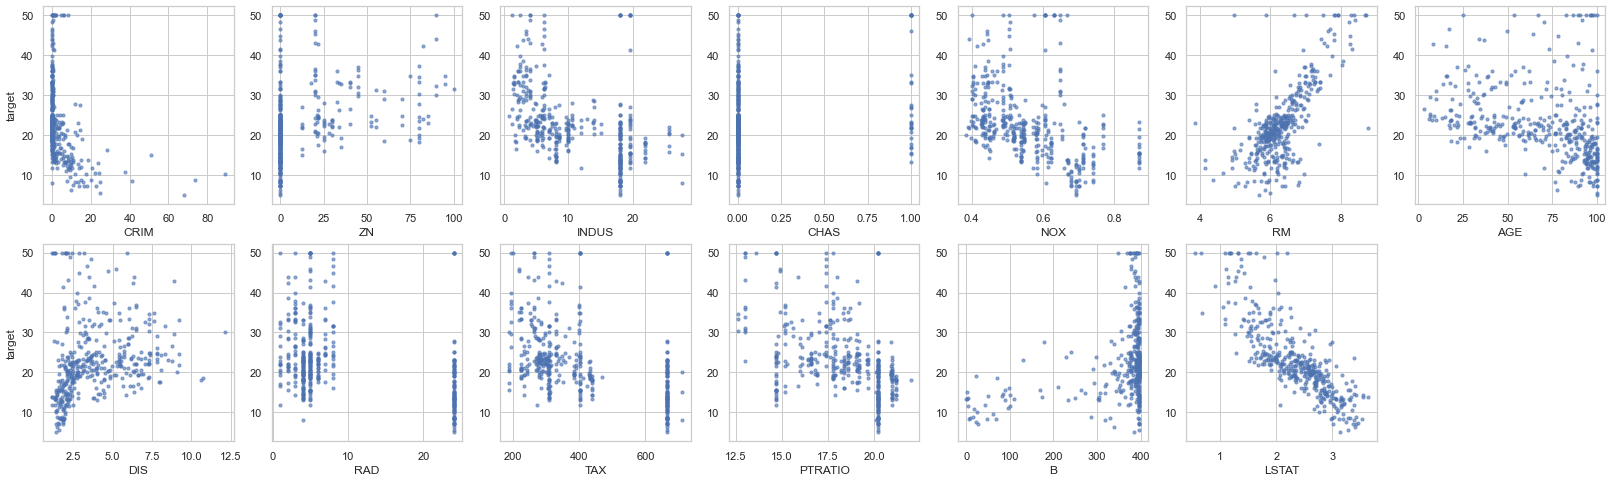

In [76]:
pairplot(x_train_log, y_train)

In [77]:
lin_reg = LinearRegression()

In [78]:
lin_reg.fit(x_train_log, y_train)

LinearRegression()

In [79]:
y_pred = lin_reg.predict(x_test_log)

In [80]:
mean_squared_error(y_test, y_pred)

18.697896839987212

In [81]:
lin_reg.score(x_test_log, y_test)

0.7450302434403294

Обратите внимение на зависимость цены от признака LSTAT. Является ли эта зависимость линейной? А какой? Попробуйте выбрать преобразование для этого признака так, чтобы получившаяся зависимость была более линейной. Добейтесь $R^2$ на тестовой выборке не меньше 0.71.

__Ответ:__

Помимо преобразований отдельных признаков полезными бывают их попарные взаимодействия. Воспользуйтесь PolynomialFeatures, чтобы добавить попарные произведения и квадраты всех признаков. Обучите Ridge-регрессию (подберите гиперпараметр!) и посчитайте $R^2$ на тесте. Сильно ли изменилось качество?

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [83]:
# pipe = make_pipeline(PolynomialFeatures(2), Ridge())

In [84]:
poly = PolynomialFeatures(2)

In [85]:
x_train_poly = poly.fit_transform(x_train)

In [86]:
gs = GridSearchCV(Ridge(), grid, scoring='r2', cv = 5, return_train_score=True)

In [87]:
gs.fit(x_train_poly, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([-13.81551056, -13.53640933, -13.25730811, -12.97820689,
       -12.69910566, -12.42000444, -12.14090322, -11.86180199,
       -11.58270077, -11.30359955, -11.02449832, -10.7453971 ,
       -10.46629588, -10.18719465,  -9.90809343,  -9.62899221,
        -9.34989098,  -9.07078976,  -8.79168854,  -8.51258731,
        -8.23348609,  -7.95438487,  -7.6752836...
         6.27977753,   6.55887875,   6.83797997,   7.1170812 ,
         7.39618242,   7.67528364,   7.95438487,   8.23348609,
         8.51258731,   8.79168854,   9.07078976,   9.34989098,
         9.62899221,   9.90809343,  10.18719465,  10.46629588,
        10.7453971 ,  11.02449832,  11.30359955,  11.58270077,
        11.86180199,  12.14090322,  12.42000444,  12.69910566,
        12.97820689,  13.25730811,  13.53640933,  13.81551056])},
             return_train_score=True, scoring='r2')

In [88]:
gs.best_score_

0.798366335785923

In [89]:
gs.best_estimator_

Ridge(alpha=13.815510557964274)

__Задание 5.__ Оптимальная архитектура, анализ.

При помощи `Pipeline` и `GridSearchCV` выберите оптимальную архитектуру, комбинируя различные методы масштабирования, степень полинома в `PolynomialFeatures`, а также регуляризаторы. Для `Lasso` поставьте максимальное количество итераций больше значения по умолчанию, чтобы оптимизация сошлась.

In [90]:
models = [
    'Lasso',
    'Ridge'
]

In [91]:
classifiers = [Lasso(max_iter=3000), 
               Ridge()]

In [92]:
params = {
    models[0]: {f'{models[0]}__alpha': alphas},
    models[1]: {f'{models[1]}__alpha': alphas,}
}

In [93]:
scalers = (StandardScaler(), MinMaxScaler())

In [94]:
for name, estimator in zip(models, classifiers):
    for scaler in scalers:
        for poly in (2,3,4):
            pipe = Pipeline([
                                ('poly', PolynomialFeatures(poly)), 
                                ('scl', scaler),
                                (name, estimator)])
            gs = GridSearchCV(pipe, params[name], scoring='r2', refit='True', n_jobs=-1, cv=5)
            gs.fit(x_train, y_train)
            print('{} - {} - Poly {} - {}'.format(name, scaler, poly, gs.score(x_test, y_test)))

Lasso - StandardScaler() - Poly 2 - 0.7713752345984444
Lasso - StandardScaler() - Poly 3 - 0.807028811682425
Lasso - StandardScaler() - Poly 4 - 0.8210339634259175
Lasso - MinMaxScaler() - Poly 2 - 0.7055523248796933
Lasso - MinMaxScaler() - Poly 3 - 0.7286726255564121
Lasso - MinMaxScaler() - Poly 4 - 0.748197579345604
Ridge - StandardScaler() - Poly 2 - 0.8485004364801337
Ridge - StandardScaler() - Poly 3 - 0.8590393365279273
Ridge - StandardScaler() - Poly 4 - 0.8643629828670077
Ridge - MinMaxScaler() - Poly 2 - 0.8492825742859262
Ridge - MinMaxScaler() - Poly 3 - 0.8659129928616287
Ridge - MinMaxScaler() - Poly 4 - 0.8697710749118627


Для одной комбинаций метода масштабирования и линейной регрессии постройте зависимость метрики $R^2$ на кросс-валидации (`GridSearchCV.cv_results_['mean_test_score']`) от значения параметра регуляризации для различных степеней полиномов в `PolynomialFeatures`.

In [95]:
param = {'Lasso__alpha': alphas}

In [96]:
ax.set_xlim(-5, 15)
ax.set_ylim(0, 1)

(0.0, 1.0)

In [97]:
gs.best_index_

52

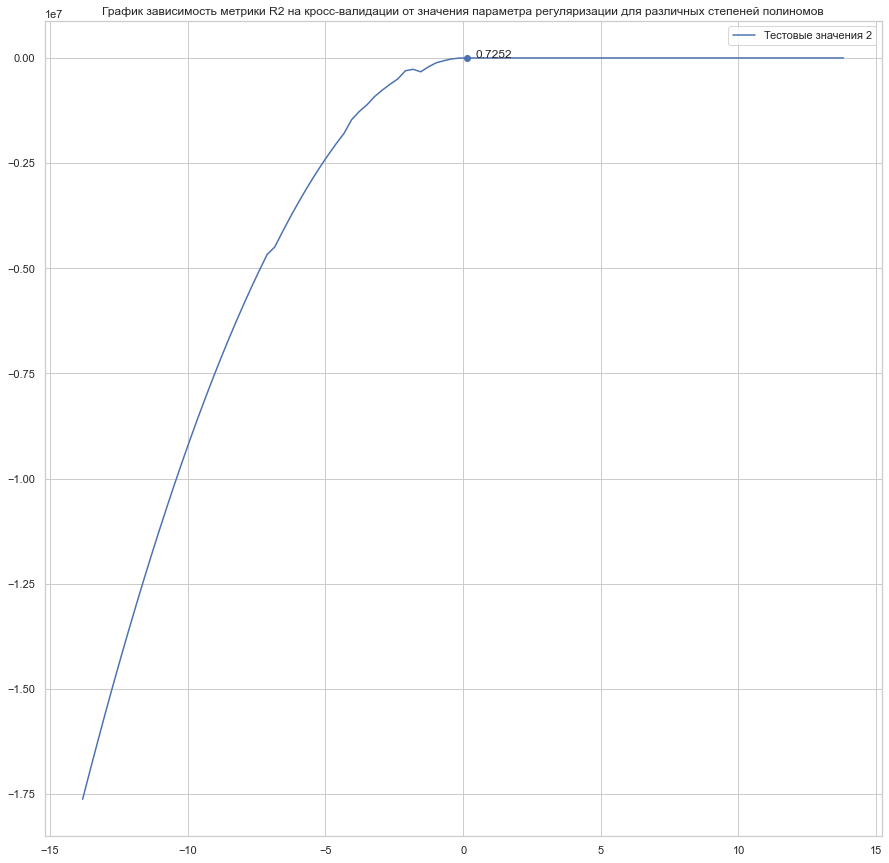

In [98]:
plt.figure(figsize=(15, 15))

ax = plt.gca()

pipe = Pipeline([
                    ('poly', PolynomialFeatures(2)), 
                    ('scl', MinMaxScaler()),
                    ('Lasso', Lasso())])
gs = GridSearchCV(pipe, param, scoring='r2', refit='True', n_jobs=-1, cv=5)
gs.fit(x_train, y_train)
gs.predict(x_test)
df = pd.DataFrame.from_dict(gs.cv_results_)
plt.plot(df['param_Lasso__alpha'], df['mean_test_score'], label='Тестовые значения {}'.format(2))

plt.scatter(df['param_Lasso__alpha'][gs.best_index_], df['mean_test_score'][gs.best_index_])
ax.annotate("%0.4f" % gs.best_score_, (df['param_Lasso__alpha'][gs.best_index_] + 0.3, gs.best_score_))
            
plt.legend()
plt.title("График зависимость метрики R2 на кросс-валидации от значения параметра регуляризации для различных степеней полиномов")
plt.show()

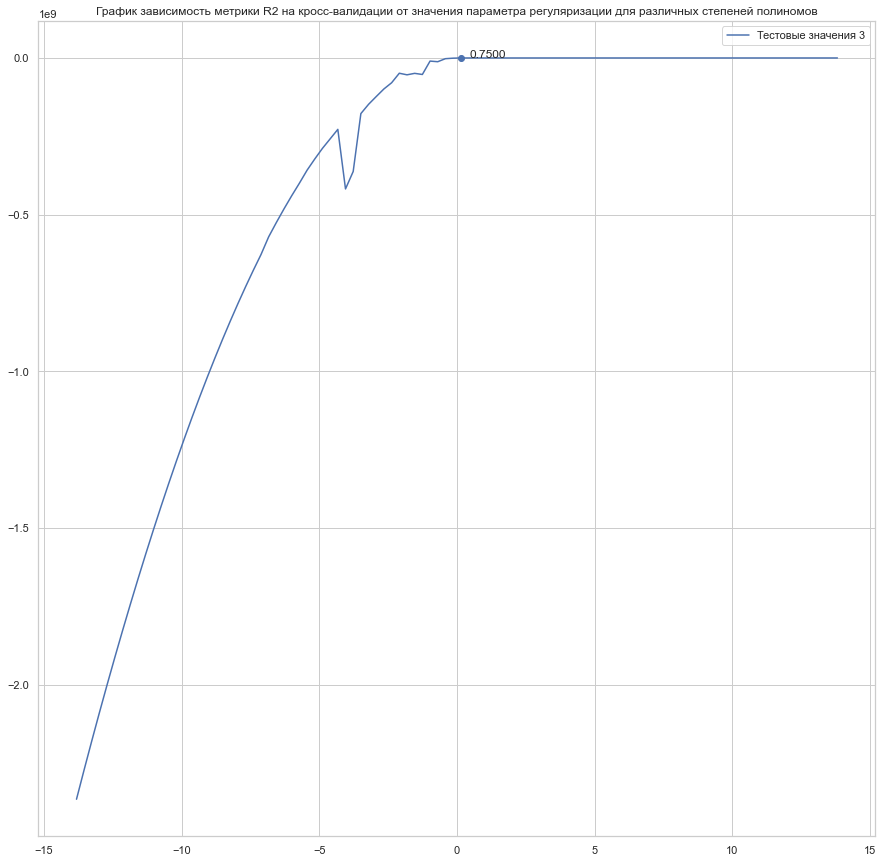

In [99]:
plt.figure(figsize=(15, 15))
ax = plt.gca()


pipe = Pipeline([
                    ('poly', PolynomialFeatures(3)), 
                    ('scl', MinMaxScaler()),
                    ('Lasso', Lasso())])
gs = GridSearchCV(pipe, param, scoring='r2', refit='True', n_jobs=-1, cv=5)
gs.fit(x_train, y_train)

df = pd.DataFrame.from_dict(gs.cv_results_)
plt.plot(df['param_Lasso__alpha'], df['mean_test_score'], label='Тестовые значения {}'.format(3))

plt.scatter(df['param_Lasso__alpha'][gs.best_index_], df['mean_test_score'][gs.best_index_])
ax.annotate("%0.4f" % gs.best_score_, (df['param_Lasso__alpha'][gs.best_index_] + 0.3, gs.best_score_))
            
plt.legend()
plt.title("График зависимость метрики R2 на кросс-валидации от значения параметра регуляризации для различных степеней полиномов")
plt.show()

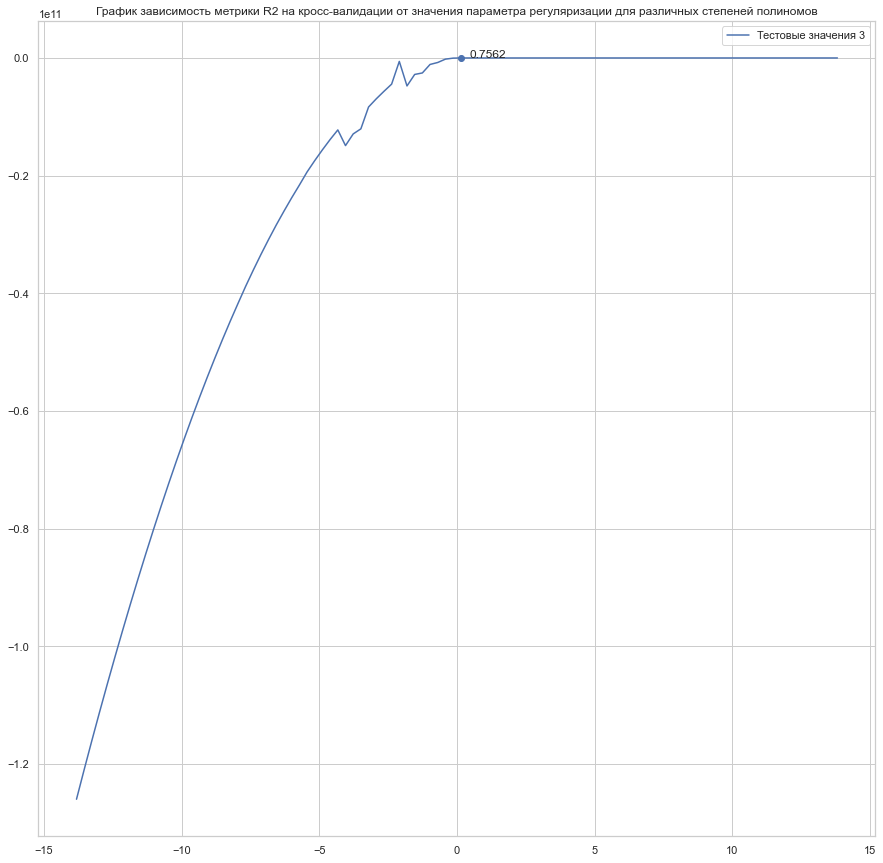

In [100]:
plt.figure(figsize=(15, 15))
ax = plt.gca()


pipe = Pipeline([
                    ('poly', PolynomialFeatures(4)), 
                    ('scl', MinMaxScaler()),
                    ('Lasso', Lasso())])
gs = GridSearchCV(pipe, param, scoring='r2', refit='True', n_jobs=-1, cv=5)
gs.fit(x_train, y_train)

df = pd.DataFrame.from_dict(gs.cv_results_)
plt.plot(df['param_Lasso__alpha'], df['mean_test_score'], label='Тестовые значения {}'.format(3))

plt.scatter(df['param_Lasso__alpha'][gs.best_index_], df['mean_test_score'][gs.best_index_])
ax.annotate("%0.4f" % gs.best_score_, (df['param_Lasso__alpha'][gs.best_index_] + 0.3, gs.best_score_))
            
plt.legend()
plt.title("График зависимость метрики R2 на кросс-валидации от значения параметра регуляризации для различных степеней полиномов")
plt.show()